In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score

In [17]:
data=pd.read_csv("C:/Users/dell/Documents/datasets/fraud/Fraud.csv")

In [18]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [40]:
data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [37]:
pf=data.groupby('type')['type','amount', 'isFraud']

<ipython-input-37-55f29cb6a21b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pf=data.groupby('type')['type','amount', 'isFraud']


In [38]:
pf.head() #1 is fraud, 0 is not fraud for isFraud
# isFlaggedFraud 0 is not flagged, 1 is flagged

,type,amount,isFraud
0,PAYMENT,9839.64,0
1,PAYMENT,1864.28,0
2,TRANSFER,181.00,1
3,CASH_OUT,181.00,1
4,PAYMENT,11668.14,0
5,PAYMENT,7817.71,0
6,PAYMENT,7107.77,0
9,DEBIT,5337.77,0
10,DEBIT,9644.94,0
15,CASH_OUT,229133.94,0


In [41]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [42]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


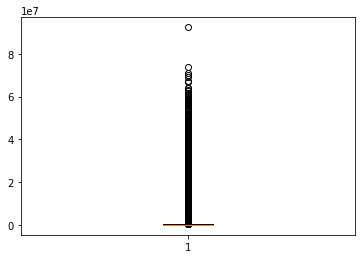

In [48]:
#finding outliers
plt.boxplot(data['amount'])
plt.show()

In [50]:
ind=data[data['amount'] > 80000000].index

In [52]:
data.drop(ind, inplace=True)

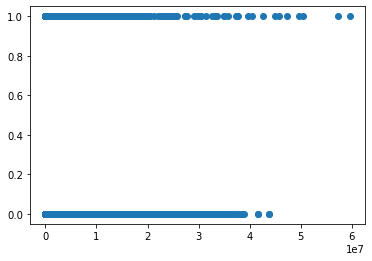

In [59]:
plt.scatter(data['oldbalanceOrg'],data['isFraud'])
plt.show()

In [61]:
ind_oldb=data[data['oldbalanceOrg']>55000000].index
data.drop(ind_oldb, inplace=True)

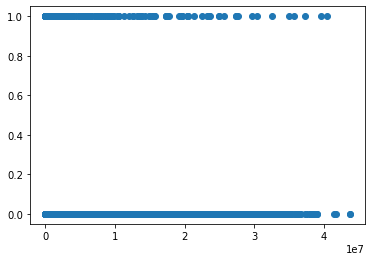

In [63]:
plt.scatter(data['newbalanceOrig'], data['isFraud'])
plt.show()

In [64]:
ind_newb=data[data['newbalanceOrig']>40000000].index
data.drop(ind_newb, inplace=True)

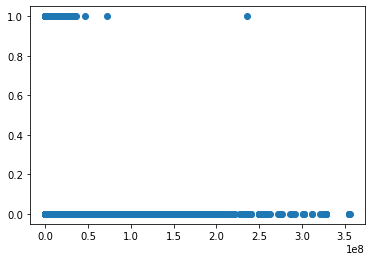

In [65]:
plt.scatter(data['oldbalanceDest'], data['isFraud'])
plt.show()

In [66]:
ind_bala=data[data['oldbalanceDest']>350000000].index
data.drop(ind_bala, inplace=True)

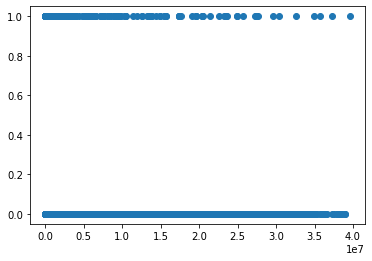

In [67]:
plt.scatter(data['newbalanceOrig'], data['isFraud'])
plt.show()

In [69]:
ind_new=data[data['newbalanceOrig']>40000000].index
data.drop(ind_new, inplace=True)

In [70]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362607e+06,6.362607e+06,6.362607e+06,6.362607e+06,6.362607e+06,6.362607e+06,6.362607e+06,6.362607e+06
mean,2.433969e+02,1.798427e+05,8.338310e+05,8.550663e+05,1.100423e+06,1.224703e+06,1.290352e-03,2.514692e-06
std,1.423318e+02,6.027122e+05,2.887807e+06,2.923700e+06,3.384633e+06,3.660496e+06,3.589828e-02,1.585776e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487140e+04,1.420800e+04,0.000000e+00,1.327055e+05,2.146611e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087213e+05,1.073150e+05,1.442569e+05,9.430325e+05,1.111906e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,7.382349e+07,4.958504e+07,3.958504e+07,3.281945e+08,3.555534e+08,1.000000e+00,1.000000e+00


In [73]:
X=data[['amount', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']]
y=data[['isFraud']]

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(X,y, test_size=0.3, stratify=y, shuffle=True, random_state=1234)

<h3> Logistic regression

In [85]:
log=LogisticRegression()
log.fit(x_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [89]:
log_pred=log.predict(x_test)
log_max=confusion_matrix(log_pred,y_test)

<AxesSubplot:>

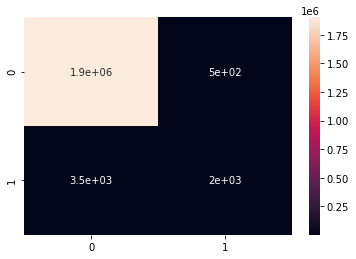

In [90]:
sns.heatmap(log_max, annot=True)

In [91]:
print('accuracy of the logistic model is: ', accuracy_score(log_pred, y_test))
print('recall score is: ', recall_score(log_pred,y_test))
print('precision score is: ', precision_score(log_pred, y_test))

accuracy of the logistic model is:  0.9979033761302358
recall score is:  0.3592463874154015
precision score is:  0.7974015428339424


<h3> decision tree

In [93]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

<AxesSubplot:>

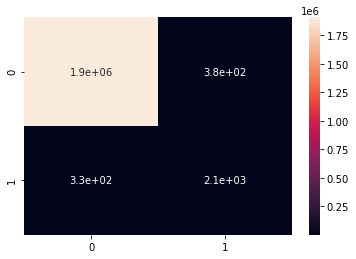

In [95]:
dt_conf=confusion_matrix(dt_pred, y_test)
sns.heatmap(dt_conf, annot=True)

In [96]:
print('accuracy of the decision tree model is: ', accuracy_score(dt_pred, y_test))
print('recall score is: ', recall_score(dt_pred,y_test))
print('precision score is: ', precision_score(dt_pred, y_test))

accuracy of the decision tree model is:  0.9996301308215758
recall score is:  0.8631665977676726
precision score is:  0.8477466504263094


<h3> Random forest

In [97]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)


<ipython-input-97-c13bb271d7b2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [100]:
rf_confusion=confusion_matrix(rf_pred, y_test)

<AxesSubplot:>

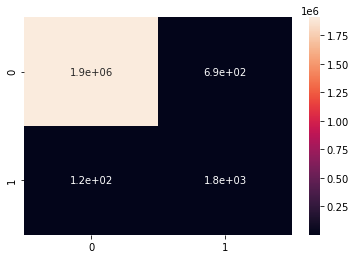

In [101]:
sns.heatmap(rf_confusion, annot=True)

In [103]:
print('accuracy of the random forest model is: ',accuracy_score(rf_pred, y_test))
print('recall score is: ',recall_score(rf_pred,y_test))
print('precision score is: ', precision_score(rf_pred, y_test))

accuracy of the random forest model is:  0.9995766936314919
recall score is:  0.938062466913711
precision score is:  0.7194478278522127
